# Classification Project

In [114]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
data = pd.read_csv("E:\\Projects folder\\census\\census.csv", header = None)
print("Number of Observations in adult dataset:", data.shape)
data.head()

Number of Observations in adult dataset: (6301, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Precision production craft & repair,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
data.columns = ['age', 'class',
               'industry_code','occupation_code','education', 
                'wage_hour', 'enrolled_edu_inst_last_wk', 'marital_status' , 'occupation_code1', 
                'mace' ,'hispanic', 'sex' ,'member_labor_union', 'reason_unemployment' ,
                'employment_type' ,'capital_gains' ,'capital_losses' ,
                'divdend_stocks', 'tax_status' ,'region_previous_residence','state_previous_residence' ,
                'household_family_stat' ,'summary_household' ,'migration_code_change_msa', 'migration_code_change_reg',
                'migration code-move within reg','stay_same_house_1','migration_prev_res_sunbelt', 
                'num_persons_worked_employer', 'family_below_18','country_birth_father','country_birth_mother' ,
                'country_birth_self' ,'citizenship','business_type','taxable_inc_amount', 'veterans_questionnaire' ,
                'veterans_benefits' ,'weeks_year' ,'instance_weight', 'income'  ]

In [4]:
data.head(2)

,age,class,industry_code,occupation_code,education,wage_hour,enrolled_edu_inst_last_wk,marital_status,occupation_code1,mace,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Precision production craft & repair,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 41 columns):
age                               6301 non-null int64
class                             6301 non-null object
industry_code                     6301 non-null int64
occupation_code                   6301 non-null int64
education                         6301 non-null object
wage_hour                         6301 non-null int64
enrolled_edu_inst_last_wk         6301 non-null object
marital_status                    6301 non-null object
occupation_code1                  6301 non-null object
mace                              6301 non-null object
hispanic                          6301 non-null object
sex                               6301 non-null object
member_labor_union                6301 non-null object
reason_unemployment               6301 non-null object
employment_type                   6301 non-null object
capital_gains                     6301 non-null int64
capital_losses    

In [ ]:
#import pandas_profiling
#profile_report = pandas_profiling.ProfileReport(data)
#profile_report

In [7]:
pd.isnull(data).any()

#checking for nulls

age                               False
class                             False
industry_code                     False
occupation_code                   False
education                         False
wage_hour                         False
enrolled_edu_inst_last_wk         False
marital_status                    False
occupation_code1                  False
mace                              False
hispanic                          False
sex                               False
member_labor_union                False
reason_unemployment               False
employment_type                   False
capital_gains                     False
capital_losses                    False
divdend_stocks                    False
tax_status                        False
region_previous_residence         False
state_previous_residence          False
household_family_stat             False
summary_household                 False
migration_code_change_msa         False
migration_code_change_reg         False


In [8]:
data.describe()

,age,industry_code,occupation_code,wage_hour,capital_gains,capital_losses,divdend_stocks,migration_code_change_msa,family_below_18,taxable_inc_amount,veterans_benefits,weeks_year,instance_weight
count,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000,6301.000000
mean,34.535629,15.720521,11.460244,62.179654,420.810824,41.861927,167.505158,1734.398873,2.011585,0.171243,1.520870,23.785907,94.505793
std,22.021257,18.103884,14.393811,293.053677,4608.193425,289.539913,1819.887749,989.100379,2.383613,0.547176,0.847265,24.435650,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1055.760000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1621.950000,1.000000,0.000000,2.000000,12.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2179.790000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,50.000000,45.000000,8000.000000,99999.000000,4608.000000,99999.000000,9462.550000,6.000000,2.000000,2.000000,52.000000,95.000000


In [9]:
data['income'].value_counts(dropna=False, normalize=True).head()

#checking for balance of the target. It shows the target is imbalance.

-50000      0.942231
 50000+.    0.057769
Name: income, dtype: float64

In [10]:
data['income']=data['income'].map({'-50000': 0, ' 50000+.': 1})
data.head(4)

#mapping the target the variable

,age,class,industry_code,occupation_code,education,wage_hour,enrolled_edu_inst_last_wk,marital_status,occupation_code1,mace,...,country_birth_mother,country_birth_self,citizenship,business_type,taxable_inc_amount,veterans_questionnaire,veterans_benefits,weeks_year,instance_weight,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Precision production craft & repair,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [11]:
#Separate categorical and numerical columns
cat_column = data.dtypes[data.dtypes == 'object']
num_column = data.dtypes[data.dtypes != 'object']

In [12]:
for col in list(cat_column.index):
    print(f"--------------------{col.title()}-------------------------")
    total= data[col].value_counts()
    percent = total / data.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')


--------------------Class-------------------------
                                 total   percent
 Not in universe                  3094  0.491033
 Private                          2320  0.368196
 Self-employed-not incorporated    262  0.041581
 Local government                  254  0.040311
 State government                  153  0.024282
 Federal government                101  0.016029
 Self-employed-incorporated         96  0.015236
 Never worked                       16  0.002539
 Without pay                         5  0.000794


--------------------Education-------------------------
                                         total   percent
 High school graduate                     1537  0.243930
 Children                                 1475  0.234090
 Some college but no degree                874  0.138708
 Bachelors degree(BA AB BS)                601  0.095382
 7th and 8th grade                         288  0.045707
 10th grade                                246  0.039041
 Ma

 Thailand                          2  0.000317


--------------------Country_Birth_Self-------------------------
                               total   percent
 United-States                  5090  0.807808
 Mexico                          312  0.049516
 ?                               168  0.026662
 Puerto-Rico                      72  0.011427
 Italy                            61  0.009681
 Germany                          48  0.007618
 Philippines                      47  0.007459
 Dominican-Republic               40  0.006348
 England                          40  0.006348
 Cuba                             37  0.005872
 Poland                           31  0.004920
 China                            31  0.004920
 El-Salvador                      31  0.004920
 Canada                           28  0.004444
 Ireland                          23  0.003650
 Columbia                         20  0.003174
 Vietnam                          18  0.002857
 South Korea                      15  0.0

In [13]:
edit_columns = ['state_previous_residence' ,
             'stay_same_house_1', 'num_persons_worked_employer', 'country_birth_mother', 
             'country_birth_self', 'citizenship','migration_code_change_reg' ]
# Replace ? with Unknown
for col in edit_columns:
    data.loc[data[col] == ' ?', col] = 'unknown'

In [14]:
# Check if ? is present
for col in edit_columns:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

? in state_previous_residence: 0
? in stay_same_house_1: 0
? in num_persons_worked_employer: 0
? in country_birth_mother: 0
? in country_birth_self: 0
? in citizenship: 0
? in migration_code_change_reg: 0


In [15]:
hs_grad = [' High school graduate',' 11th grade',' 10th grade',' 9th grade',' 12th grade no diploma']
elementary = [' 1st 2nd 3rd or 4th grade',' Less than 1st grade',' 7th and 8th grade',' 5th or 6th grade']

#replace elements in list.
data['education'].replace(hs_grad,' HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = ' elementary_school',inplace = True)

data['education'].value_counts()

 HS-grad                                   2257
 Children                                  1475
 Some college but no degree                 874
 Bachelors degree(BA AB BS)                 601
 elementary_school                          464
 Masters degree(MA MS MEng MEd MSW MBA)     218
 Associates degree-occup /vocational        156
 Associates degree-academic program         152
 Prof school degree (MD DDS DVM LLB JD)      59
 Doctorate degree(PhD EdD)                   45
Name: education, dtype: int64

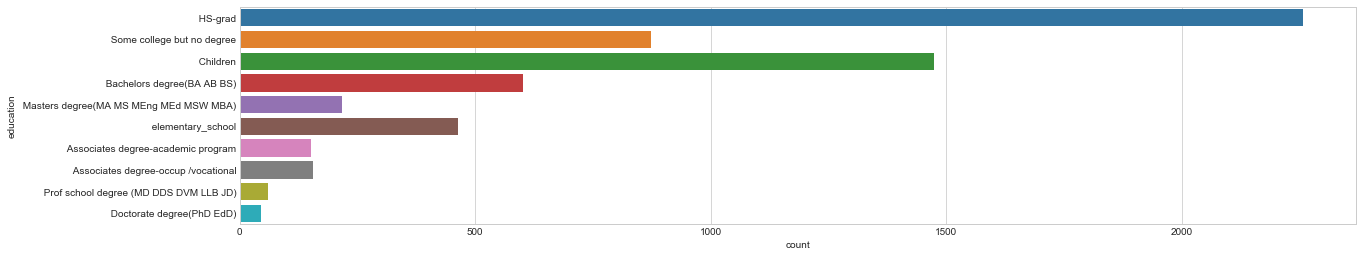

In [16]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=data);

In [17]:
married= [' Married-civilian spouse present',' Married-spouse absent',' Married-A F spouse present']
separated = [' Separated',' Divorced',' Widowed']

#replace elements in list.
data['marital_status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital_status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital_status'].value_counts()

Married           2749
 Never married    2720
Separated          832
Name: marital_status, dtype: int64

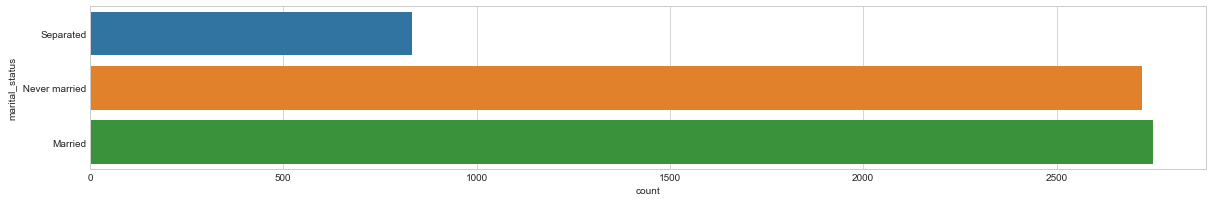

In [18]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital_status", data=data);

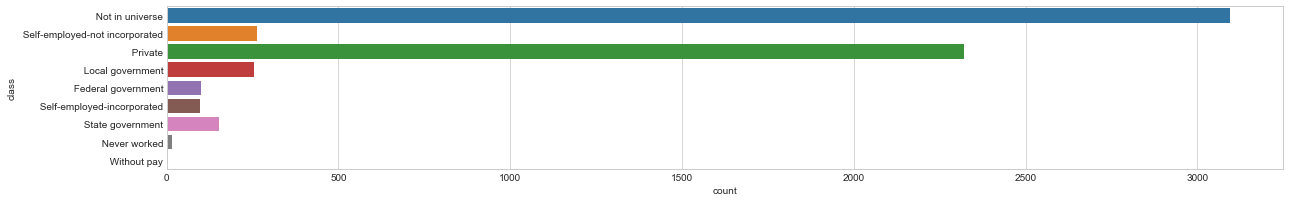

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="class", data=data);

In [20]:
self_employed = [' Self-employed-not incorporated',' Self-employed-incorporated']
govt_employees = [' State government',' Federal government', ' Local government']

#replace elements in list.
data['class'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['class'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['class'].value_counts()

 Not in universe    3094
 Private            2320
Govt_employees       508
Self_employed        358
 Never worked         16
 Without pay           5
Name: class, dtype: int64

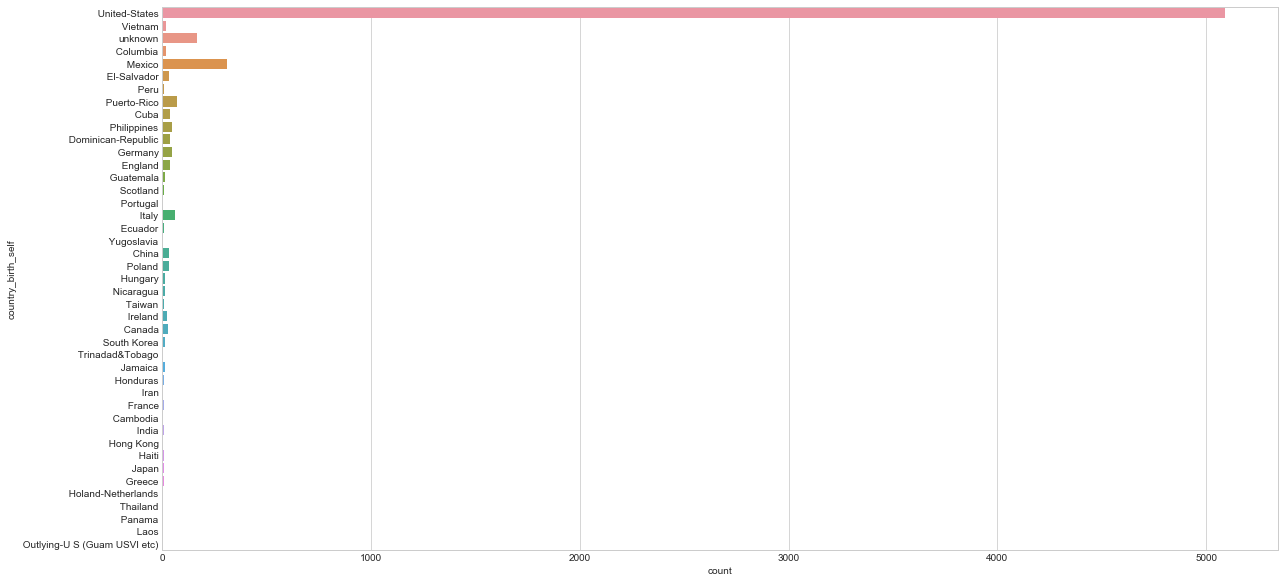

In [21]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_self", data=data);

In [23]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['country_birth_self'].replace(to_replace = US ,value = 'US',inplace = True)
data['country_birth_self'].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)

data['country_birth_self'].value_counts()

US            5090
Outside_US    1211
Name: country_birth_self, dtype: int64

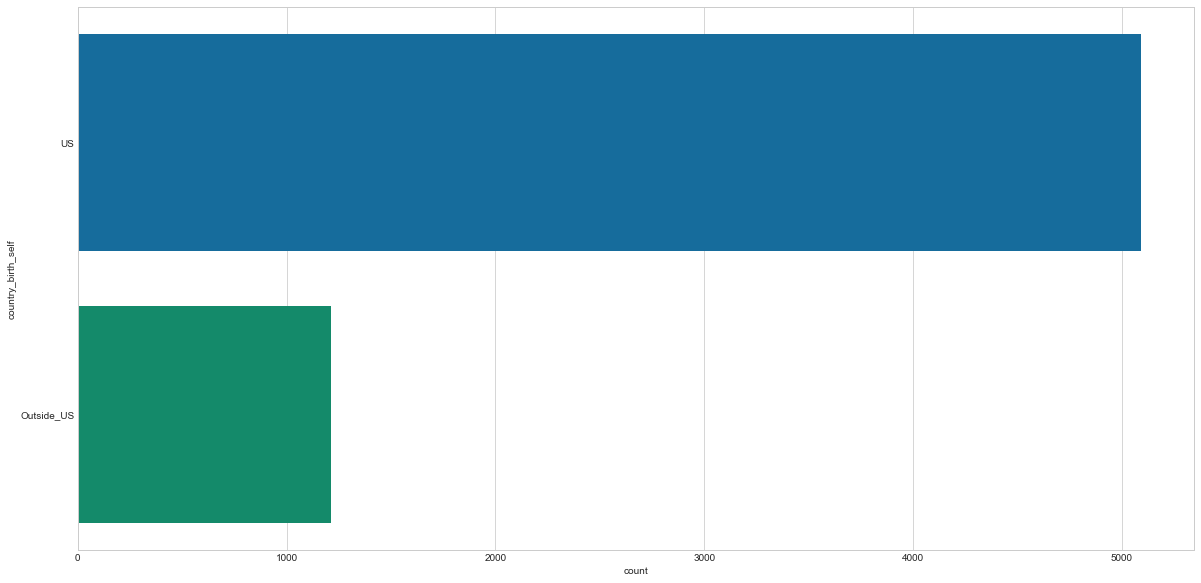

In [24]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_self", data=data);

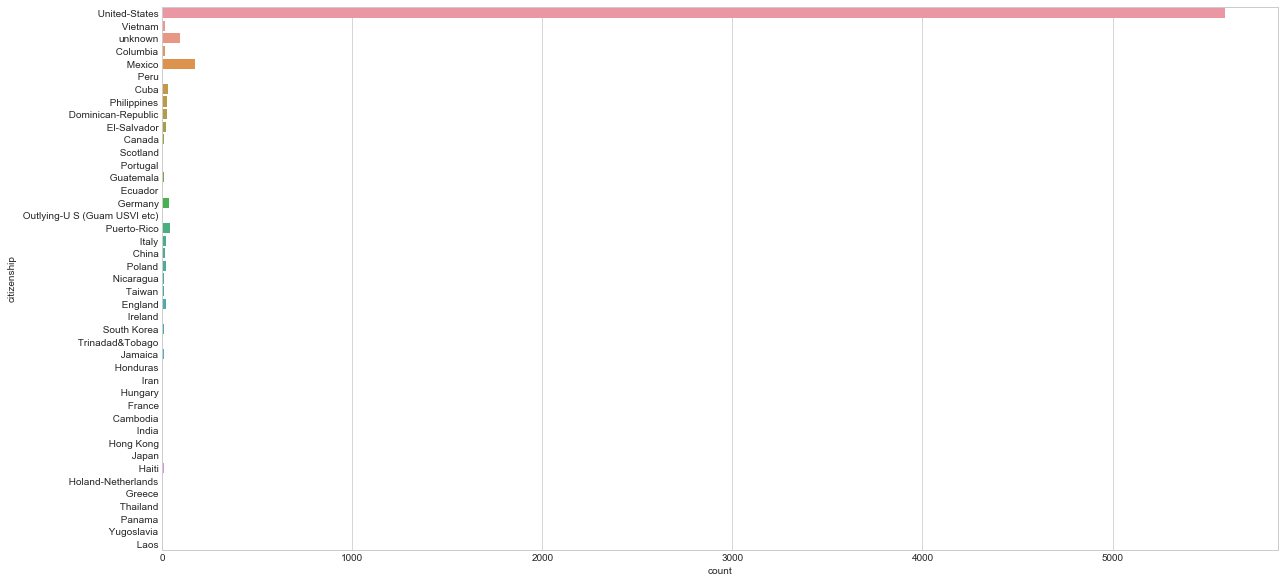

In [25]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,10)) 
sns.countplot(y="citizenship", data=data);

In [26]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['citizenship'].replace(to_replace = US ,value = 'US',inplace = True)
data['citizenship'].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)

data['citizenship'].value_counts() # Country_Birth_Mother

US            5591
Outside_US     710
Name: citizenship, dtype: int64

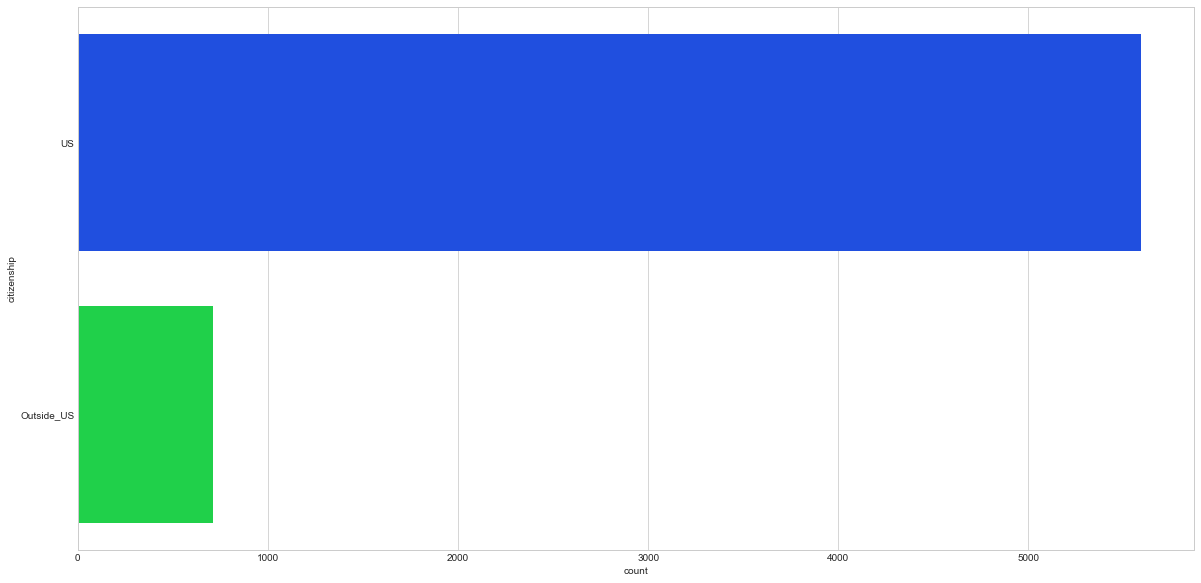

In [27]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,10)) 
sns.countplot(y="citizenship", data=data);

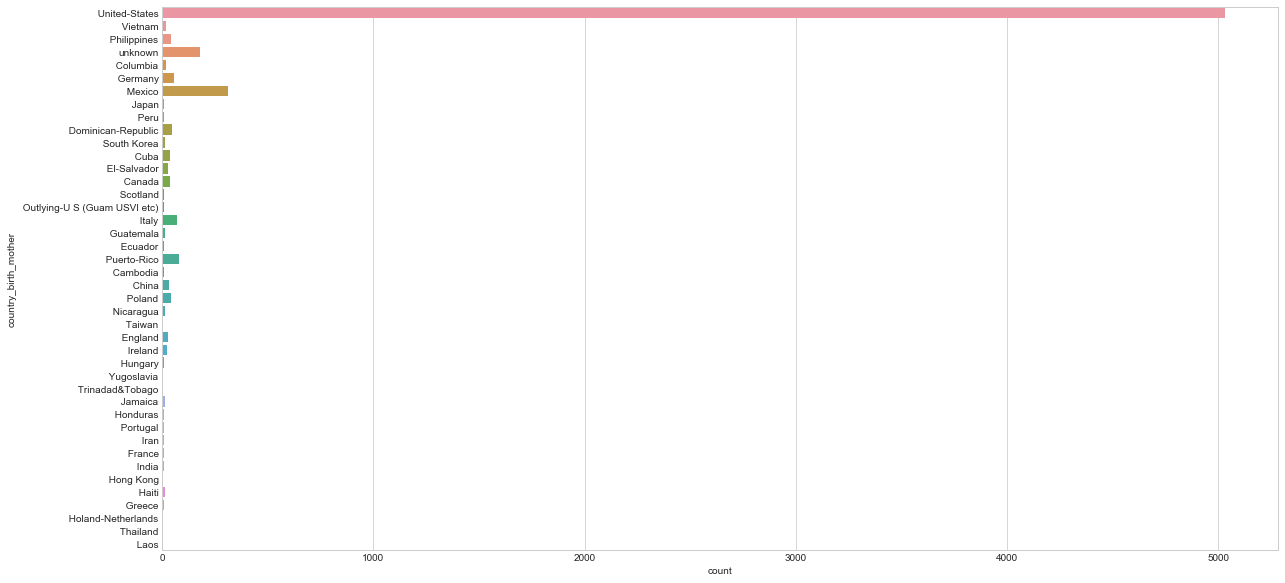

In [28]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_mother", data=data);

In [29]:
US = [' United-States']
Outside_US = ['unknown', ' Cambodia',' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
              ' France', ' Germany',' Greece',' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong Kong', ' Hungary',
              ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-U S (Guam USVI etc)', ' Panama',
              ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South Korea', ' Taiwan', ' Thailand',
              ' Trinadad&Tobago', ' Vietnam', ' Yugoslavia']

#replace elements in list.
data['country_birth_mother'].replace(to_replace = US ,value = 'US',inplace = True)
data['country_birth_mother'].replace(to_replace = Outside_US,value = 'Outside_US',inplace = True)

data['country_birth_mother'].value_counts() # Country_Birth_Mother

US            5032
Outside_US    1269
Name: country_birth_mother, dtype: int64

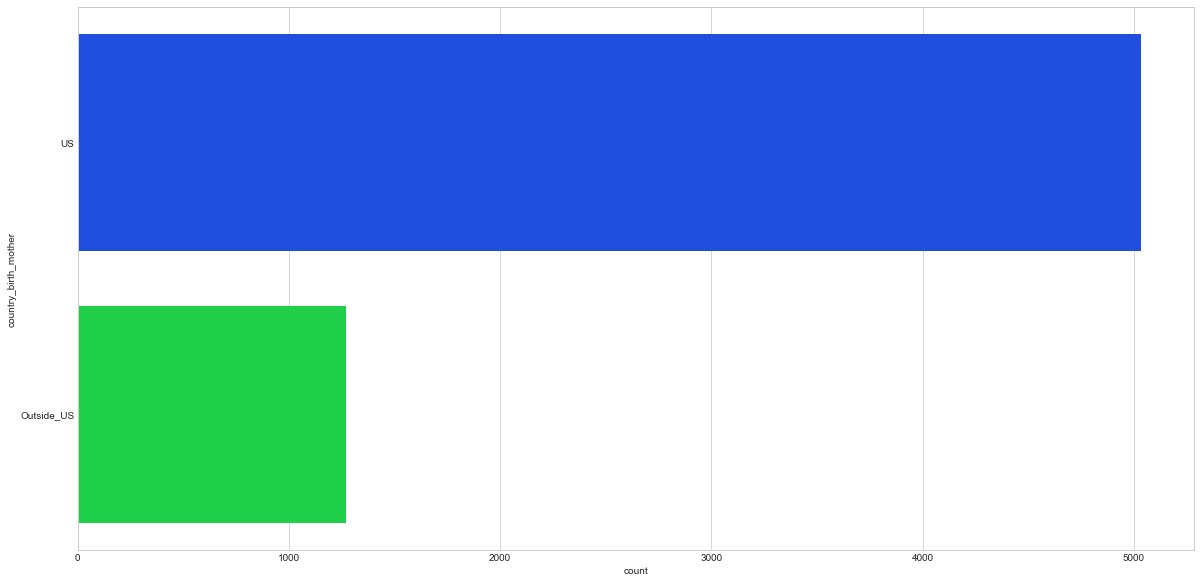

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="country_birth_mother", data=data);

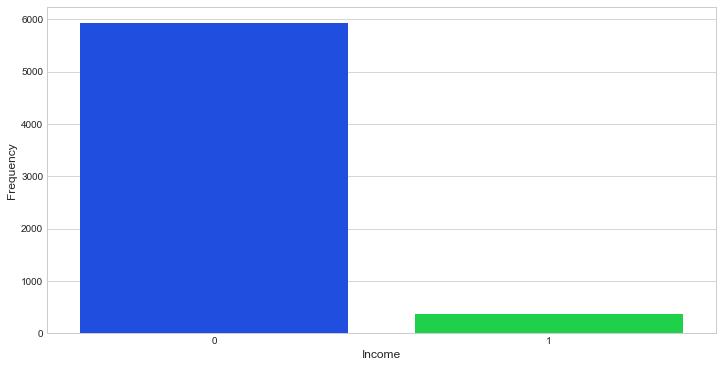

In [31]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = data);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);


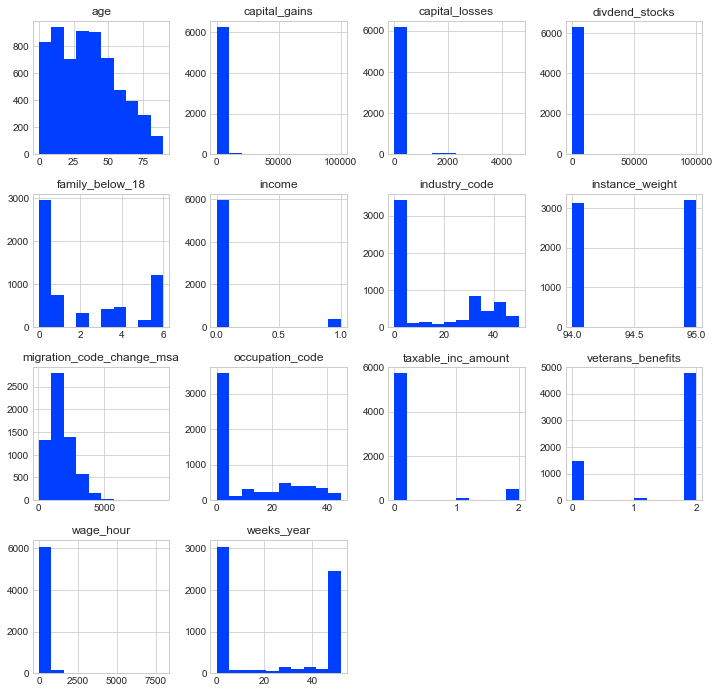

In [32]:
data[list(num_column.index)].hist(figsize = (12,12));

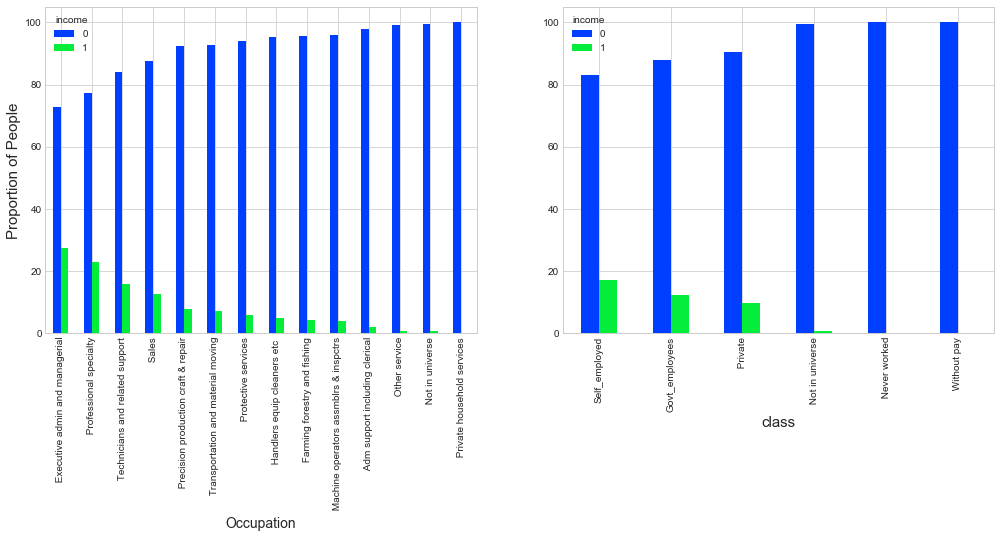

In [33]:
table_occ = pd.crosstab(data['occupation_code1'], data['income'])
table_class = pd.crosstab(data['class'], data['income'])
table_edu = pd.crosstab(data['education'], data['income'])
table_marital = pd.crosstab(data['marital_status'], data['income'])
table_race = pd.crosstab(data['mace'],data['income'])
table_sex = pd.crosstab(data['sex'], data['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occ.div(table_occ.sum(axis= 1),axis = 0)*100).sort_values(by= 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 15);


ax = fig.add_subplot(1,2,2)
plt.style.use('seaborn-whitegrid')
(table_class.div(table_class.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("class",fontsize = 15);

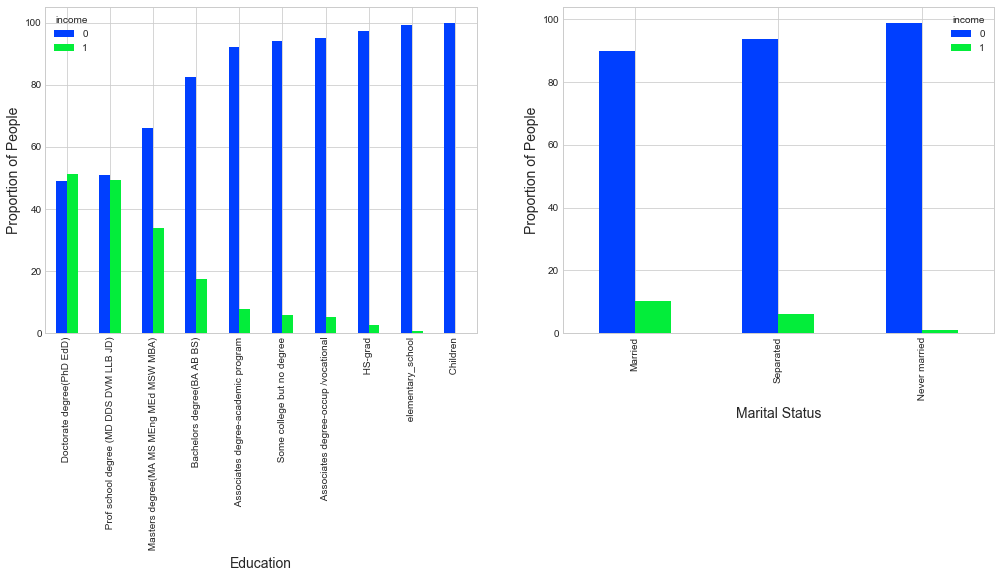

In [34]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

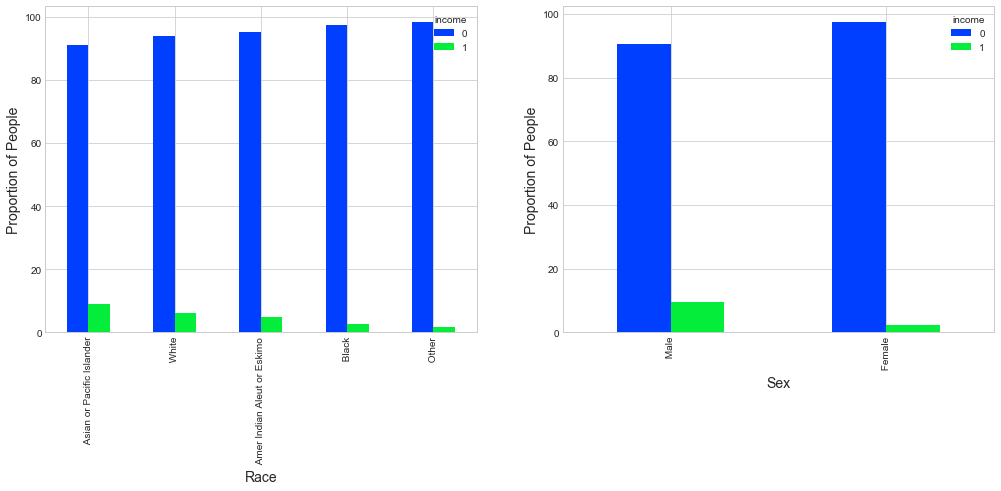

In [35]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

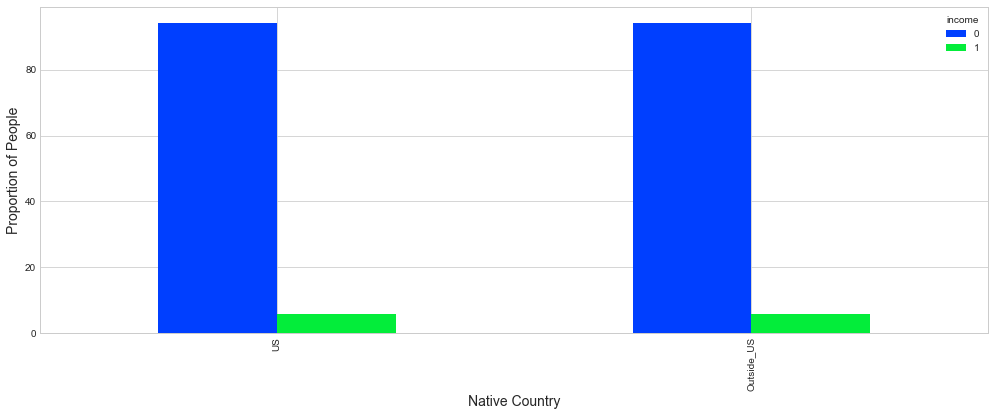

In [36]:
table_country = pd.crosstab(data['country_birth_self'], data['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

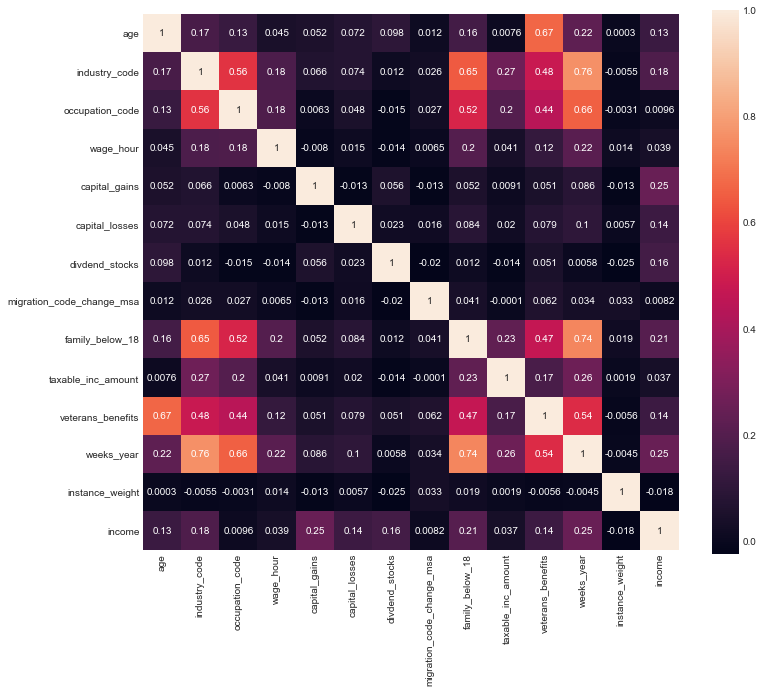

In [37]:
fig = plt.figure(figsize = (12,10))

sns.heatmap(data[list(num_column.index)].corr(),annot = True,square = True);

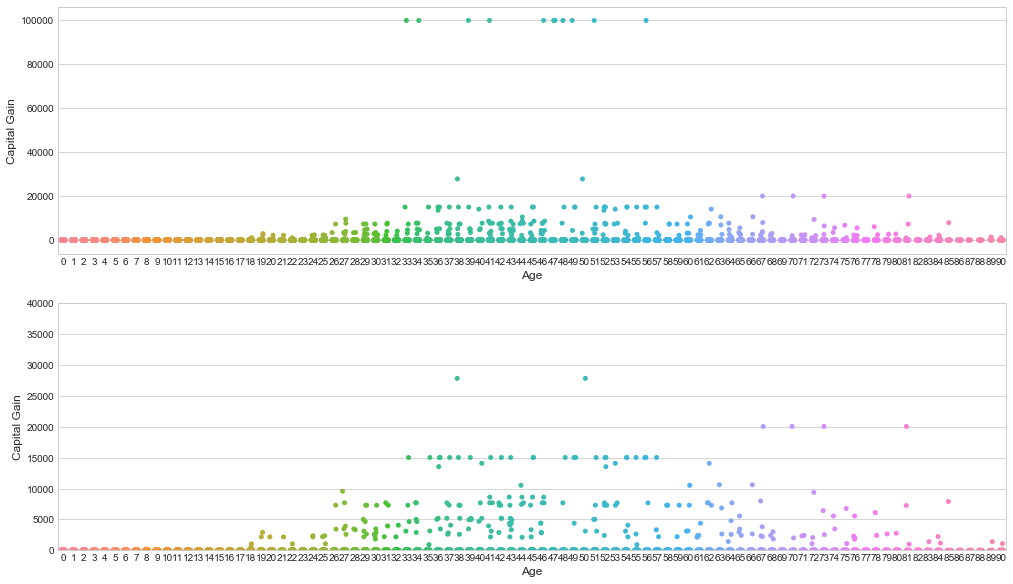

In [38]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital_gains', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);


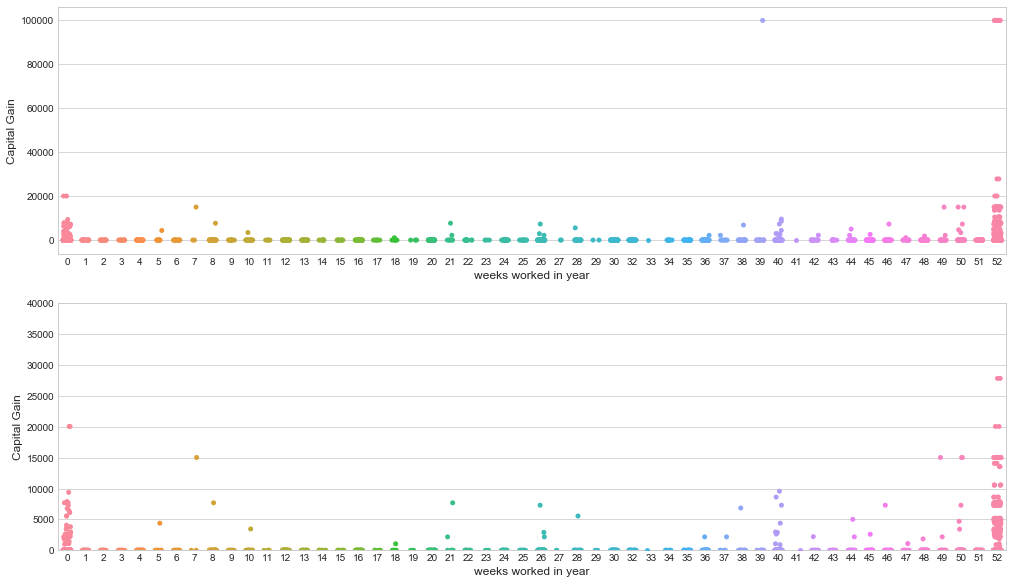

In [40]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('weeks_year', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('weeks worked in year',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('weeks_year', 'capital_gains', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('weeks worked in year',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);


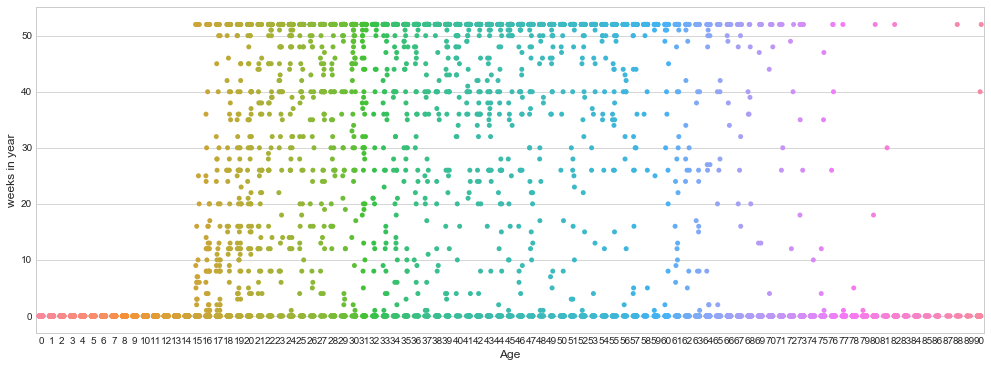

In [41]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','weeks_year', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('weeks in year',fontsize = 12);

In [42]:
num_col_update = ['age','capital_gains', 'capital_losses','weeks_year' ,'instance_weight', 'family_below_18']
cat_col_update = ['class', 'education','enrolled_edu_inst_last_wk', 'marital_status', 'occupation_code1', 
                'mace' ,'hispanic', 'sex' ,'member_labor_union', 'reason_unemployment' , 'employment_type',
               'tax_status' ,'region_previous_residence','state_previous_residence' ,
                'household_family_stat' ,'summary_household' ,'migration_code_change_msa', 'migration_code_change_reg'
                , 'stay_same_house_1','migration_prev_res_sunbelt', 
                'num_persons_worked_employer','country_birth_father','country_birth_mother' ,
                'country_birth_self' ,'citizenship', 'business_type','taxable_inc_amount', 'veterans_questionnaire' ,
                'veterans_benefits' , 'income']

In [43]:
#using Robust scaler because as we saw from the various trends that different features have different scale.
#reason for using Robust scaler is that it is not senstitve for outliers
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
scaler = RobustScaler()
pd.DataFrame(scaler.fit_transform(data[num_col_update]),columns = num_col_update).head(3)

,age,capital_gains,capital_losses,weeks_year,instance_weight,family_below_18
0,1.142857,0.0,0.0,-0.230769,0.0,-0.25
1,0.714286,0.0,0.0,0.769231,-1.0,0.00
2,-0.428571,0.0,0.0,-0.230769,0.0,-0.25


In [44]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_update
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_update)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [45]:
num_df = pipeline.fit_transform(data)
num_df.shape
cols = ['']

C:\ProgramData\New folder\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_update)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(data)
cat_df.shape

(6301, 216)

In [47]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [48]:
finaldata = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {finaldata.shape}")

Number of observations in final dataset: (6301, 223)


In [49]:
y = finaldata['income']
finaldata.drop(labels = ['id','income'],axis = 1,inplace = True)
X = finaldata

In [50]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)

In [71]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9476467477525119
Recall Score: 0.6595744680851063
Precision Score: 0.2719298245614035
ROC_AUC curve: 0.8072818110490608
Confusion Matrix:
 [[1761   83]
 [  16   31]]


In [80]:
#With Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty' : ['l1', 'l2']
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  42 out of  42 | elapsed:    1.1s finished


Best Hyper Parameters: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.9460602855631941
Recall Score: 0.603448275862069
Precision Score: 0.30701754385964913
ROC_AUC curve: 0.7801747653178321
Confusion Matrix:
 [[1754   79]
 [  23   35]]


# Decision Tree

In [54]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9280803807509255
Recall Score: 0.39215686274509803
Precision Score: 0.3508771929824561
ROC_AUC curve: 0.6753964861517553
Confusion Matrix:
 [[1715   74]
 [  62   40]]


In [55]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.9465891062929667
Recall Score: 0.76
Precision Score: 0.16666666666666666
ROC_AUC curve: 0.8545444801714898
Confusion Matrix:
 [[1771   95]
 [   6   19]]


# Random Forest

In [56]:
#Without Hyper Parameters Tuning
#Randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9487043892120571
Recall Score: 0.7575757575757576
Precision Score: 0.21929824561403508
ROC_AUC curve: 0.8548373943960597
Confusion Matrix:
 [[1769   89]
 [   8   25]]


In [57]:
#With Hyper Parameters Tuning and grid search
#Randomforest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6], 
          'random_state':[123],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("ROC_AUC curve:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.9471179270227393
Recall Score: 0.75
Precision Score: 0.18421052631578946
ROC_AUC curve: 0.8500402576489533
Confusion Matrix:
 [[1770   93]
 [   7   21]]


# KNN Neighbors

In [64]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9397144368059228
Confusion Matrix:
 [[1777  114]
 [   0    0]]


In [67]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {'n_neighbors':[5,7,8,9,10,3,12,1],
          'leaf_size':[10,12,14,30,50,100]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 144 out of 144 | elapsed:   19.3s finished


Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 8}
Accuracy: 0.9397144368059228
Confusion Matrix:
 [[1777  114]
 [   0    0]]


# SVM

In [68]:
#Without Hyper Parameters Tuning
#SVM
from sklearn import svm
model = svm.SVC(random_state=1234)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9397144368059228
Confusion Matrix:
 [[1777  114]
 [   0    0]]


In [61]:
#With Hyper Parameters Tuning
#SVM
from sklearn.model_selection import GridSearchCV
model=svm.SVC()
params = {'C': [2,3], 
          'kernel': ['linear','rbf'],
         'gamma' : [0.01, 1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test))
print("Precision Score:",metrics.precision_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=8)]: Done   4 out of  12 | elapsed: 16.7min remaining: 33.5min
[Parallel(n_jobs=8)]: Done  12 out of  12 | elapsed: 46.0min finished


Best Hyper Parameters:
 {'C': 3, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.9423585404547858
Recall Score: 0.5454545454545454
Precision Score: 0.2631578947368421
Confusion Matrix:
 [[1752   84]
 [  25   30]]


In [ ]:
#LogisticRegression with no parameters accuracy score: 0.9476467477525119
#Logistic Regression with gridsearch cv and parameters accuracy score: 0.9460602855631941

#Decision Tree with no parameters accuracy score: 0.9280803807509255
#Decision Tree with gridsearch cv and parameters accuracy score: 0.9465891062929667

#Random Forest with no parameters accuracy score: 0.9487043892120571
#Random Forest with gridsearch cv and parameters accuracy score: 0.9471179270227393

#KNN with no parameters accuracy score: Accuracy: 0.9397144368059228
#KNN with gridsearch cv and parameters accuracy score: 0.939714436805

#SVM with no parameters accuracy score: 0.9397144368059228
#SVM with gridsearch cv and parameters accuracy score: 0.9423585404547858

#When we compare all the models, we can find that Random forest has good accuaracy score when compared to other models.


# Regression Project

In [81]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [82]:
train = pd.read_csv("D:\\Machine Learning Class\\regression\\train.csv")

In [83]:
print("Number of Observations in housing dataset:", train.shape)
train.head(2)

Number of Observations in housing dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [85]:
print('train df has {} rows and {} features'.format(train.shape[0],train.shape[1]))

train df has 1460 rows and 81 features


In [86]:
pd.isnull(train).any()

#checking for nulls

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [87]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [88]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [89]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [90]:
#Separate categorical and numerical columns
cat_column = train.dtypes[train.dtypes == 'object']
num_column = train.dtypes[train.dtypes != 'object']

In [91]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [92]:
# Missing Value Handling

def HandleMissingValues(df):
    # for Object columns fill using 'Unknown'
    # for Numeric columns fill using 'median'
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'Unknown'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


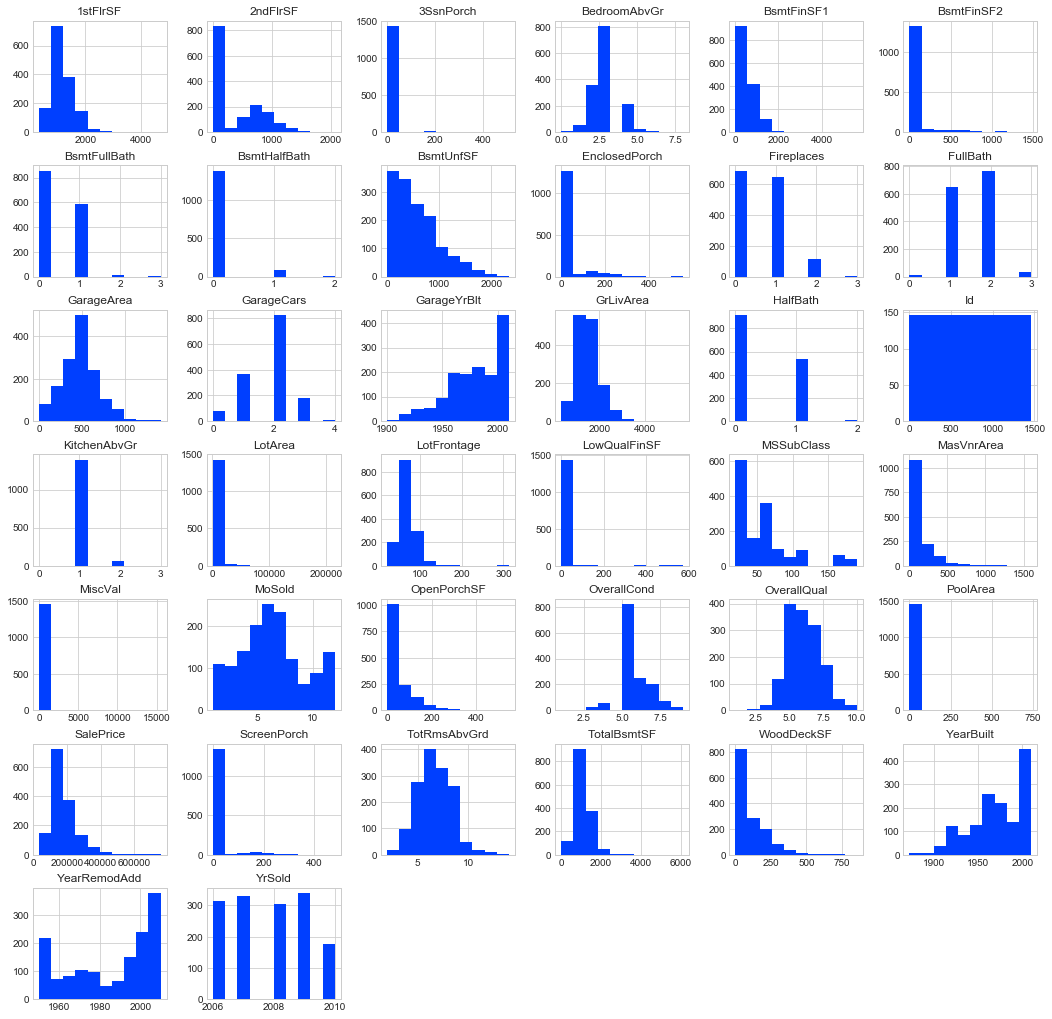

In [93]:
train[list(num_column.index)].hist(figsize = (18,18));

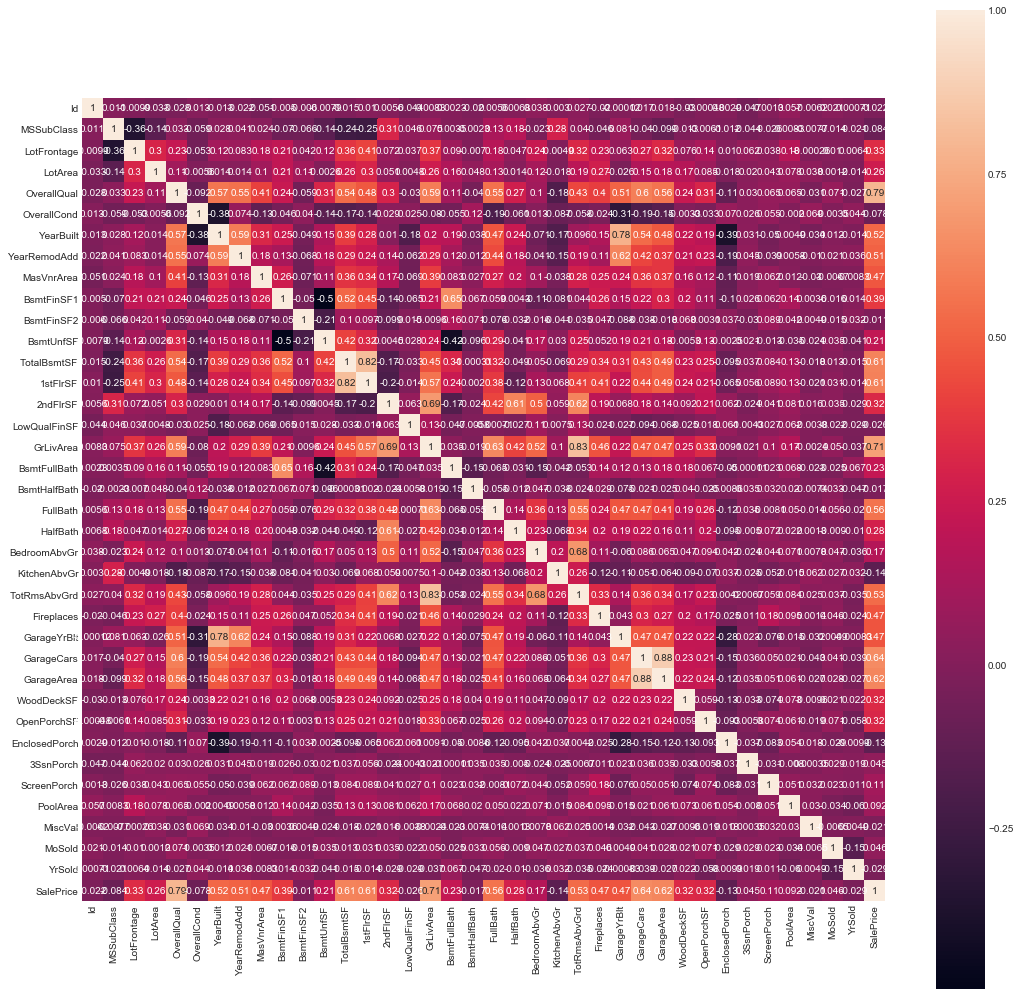

In [94]:
fig = plt.figure(figsize = (18,18))

sns.heatmap(train[list(num_column.index)].corr(),annot = True,square = True);

In [95]:
from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) )
        train[col] = le.transform(list(train[col].astype(str).values))

In [96]:
y = train['SalePrice']
train.drop(labels = ['SalePrice'],axis = 1,inplace = True)
X = train

In [97]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4


In [98]:
#I have used Robust scaler because it is not sensitve to outliers
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

# Linear Regression

In [100]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.feature_selection import RFE

In [101]:
#Without Hyper Parameters Tuning
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.8430060216261815
test score:  0.8327191886203538
r_square: 0.7770766482659935


In [102]:
#gridsearch cv for linear regression
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8,  verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  22 out of  24 | elapsed:    4.7s remaining:    0.3s


Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': False, 'normalize': True}
training score: 0.8430060216261815
test score:  0.8327191886203509
r_square: 0.7770766482659888


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    5.0s finished


# # KNN Regressor

In [103]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

training score: 0.8430060216261815
test score:  0.8327191886203509
r_square: 0.09513175845486121


In [116]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.6s


Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
training score: 0.8566822264558809
test score:  0.5780408195037023
r_square: 0.047146016958346304


[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed:    6.6s finished


# Ridge

linear regression train score: 0.8430060216261815
linear regression test score: 0.8327191886203538
ridge regression train score low alpha: 0.8430059364643445
ridge regression test score low alpha: 0.8327382809503818
ridge regression train score high alpha: 0.8363651552924779
ridge regression test score high alpha: 0.8380767815679881


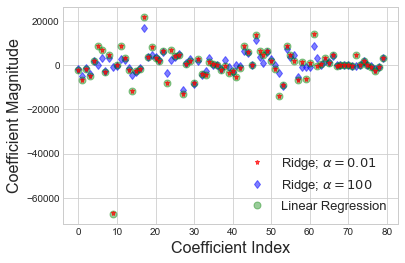

In [106]:
#Without Hyper Parameters Tuning
#Ridge
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [108]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  45 | elapsed:    0.0s remaining:    0.2s


Best Hyper Parameters:
 {'alpha': 200}
training score: 0.82669380241475
test score:  0.8751295988161242
r2: 0.8751295988161242


[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.1s finished


# Polynomial Regression

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
model1 = GridSearchCV(PolynomialRegression(), param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

model1.fit(X_train, y_train)
best_parameters = model1.best_params_
print(best_parameters)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polyno

[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.2s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.2s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.2s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.2s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__norma

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    9.1s finished


{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
training score: -1.0619426936392399e-19
test score:  -4860278611.796204
r_square: 0.37655901669347835


# Lasso

training score: 0.8430056033168539
test score:  0.8329278069423606
number of features used:  79
training score for alpha=0.01: 0.8430060215843505
test score for alpha =0.01:  0.8327212796368633
number of features used: for alpha =0.01: 79
training score for alpha=0.0001: 0.8430060216261771
test score for alpha =0.0001:  0.832719209661988
number of features used: for alpha =0.0001: 80


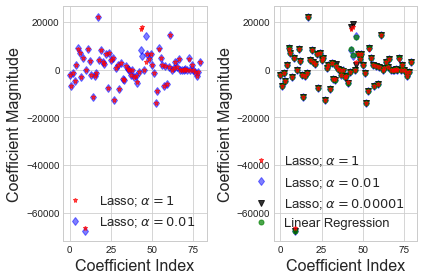

In [110]:
#Without Hyper Parameters Tuning
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [111]:
#With Hyper Parameters Tuning and grid search
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:  1.5min finished


Best Hyper Parameters:
 {'alpha': 0.14907119849998599}
training score: 0.8322576822537657
test score:  0.8991335884900289
r2: 0.8991335884900289


# SVR 

In [112]:
#Without Hyper Parameters Tuning
#SVR
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=1.0, epsilon=0.2)
model1.fit(X_train,y_train)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.06864963346539599
test score:  0.10504097937219957
r2: 0.10504097937219958


In [113]:
#SVR with grid search 

from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf', 'sigmoid'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=8, verbose=2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   16.8s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:   47.3s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 3265 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 3600 out of 3600 | elapsed:  2.7min finished


Best Hyper Parameters:
 {'C': 200.00000000000003, 'gamma': 0.10506813687792228, 'kernel': 'sigmoid'}
training score: 0.4539020709573766
test score:  0.457679058690835
r2: 0.4576790586908349


In [118]:
###

#Checking all the models based on its R2 value, test score. We can conclude that Lasso with Gridsearch and Cross validation
#is the best regressor for this dataset.

###